<a href="https://colab.research.google.com/github/cyingd/cyingd1/blob/main/DataGen_Europarl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install stanza

import pandas as pd
import stanza
import string

# Read in TSV
file_nl = "Augmented_NL_Europarl.tsv"
df_nl = pd.read_csv(file_nl, sep='\t', header=None)
file_en = "Augmented_ENG_Europarl.tsv"
df_en = pd.read_csv(file_en, sep='\t', header=None)

nlp_nl = stanza.Pipeline('nl', processors='tokenize,pos,lemma,depparse')
nlp_en = stanza.Pipeline('en', processors='tokenize,pos,lemma, depparse')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: nl (Dutch):
| Processor | Package         |
-------------------------------
| tokenize  | alpino          |
| mwt       | alpino          |
| pos       | alpino_charlm   |
| lemma     | alpino_nocharlm |
| depparse  | alpino_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unle

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded vi

In [3]:
lines_nl = df_nl[0]
processed_nl = []
for line in lines_nl:
    processed_nl.append(nlp_nl.process(line))

In [4]:
lines_en = df_en[0]
processed_en = []
for line in lines_en:
    processed_en.append(nlp_en.process(line))

TTR


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource


def remove_stopwords_and_punctuation(text, language):
    try:
        # Get the stopwords for the specified language
        stop_words = set(stopwords.words(language))
    except OSError:
        raise ValueError(f"Stopwords for language '{language}' not available.")

    # Tokenize the input text
    words = word_tokenize(text)

    # Remove stopwords and punctuation
    filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]

    # Join filtered words back into a single string
    return ' '.join(filtered_words)
"""
# Example usage
if __name__ == "__main__":
    dutch_text = "Dit is een voorbeeldzin met enkele stopwoorden en interpunctie!"
    english_text = "This is an example sentence with some stopwords and punctuation."

    print("Original Dutch text:", dutch_text)
    print("Dutch text without stopwords and punctuation:", remove_stopwords_and_punctuation(dutch_text, 'dutch'))

    print("Original English text:", english_text)
    print("English text without stopwords and punctuation:", remove_stopwords_and_punctuation(english_text, 'english'))
"""

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


'\n# Example usage\nif __name__ == "__main__":\n    dutch_text = "Dit is een voorbeeldzin met enkele stopwoorden en interpunctie!"\n    english_text = "This is an example sentence with some stopwords and punctuation."\n\n    print("Original Dutch text:", dutch_text)\n    print("Dutch text without stopwords and punctuation:", remove_stopwords_and_punctuation(dutch_text, \'dutch\'))\n\n    print("Original English text:", english_text)\n    print("English text without stopwords and punctuation:", remove_stopwords_and_punctuation(english_text, \'english\'))\n'

In [6]:
from collections import Counter

doc_representation_nl = []

for sentence in processed_nl:
    # Convert Stanza Sentence objects to a single string
    text = " ".join([sent.text for sent in sentence.sentences])

    # Apply remove_stopwords_and_punctuation to the string
    filtered_text = remove_stopwords_and_punctuation(text, 'dutch')

    # Calculate TTR using the filtered text
    token_frequencies_nl = Counter(word_tokenize(filtered_text)) # Directly tokenize filtered text
    num_types = len(token_frequencies_nl.keys())
    num_tokens = sum(token_frequencies_nl.values())

    # Avoid division by zero if num_tokens is 0
    if num_tokens == 0:
        tt_ratio = 0  # or any other appropriate value for your use case
    else:
        tt_ratio = num_types / float(num_tokens)

    doc_representation_nl.append(tt_ratio)

print(doc_representation_nl)

[1.0, 1.0, 0.9333333333333333, 1.0, 0.9523809523809523, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9090909090909091, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9583333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0, 0.9230769230769231, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8636363636363636, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.875, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 0.9444444444444444, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 0.8571428571428571, 0.9375, 1.0, 1.0, 0.8125, 1.0, 1.0, 0.84375, 0.8333333333333334, 0.9259259259259259, 0.9375, 0.9615384615384616, 0.8947368421052632, 0.9333333333333333, 0.8823529411764706, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9285714285714286, 0.8888888888888888, 0.8235294117647058, 1.0, 0.9545454545454546, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8947368421052632, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9230769230769231, 1.0,

In [7]:
token_frequencies_nl_all = Counter()

for sentence in processed_nl:
    # Convert Stanza Sentence objects to a single string
    text = " ".join([sent.text for sent in sentence.sentences])

    # Apply remove_stopwords_and_punctuation to the string
    filtered_text = remove_stopwords_and_punctuation(text, 'dutch')

    # Tokenize the filtered text and update the counter
    all_tokens = word_tokenize(filtered_text)
    token_frequencies_nl_all.update(all_tokens)

print(token_frequencies_nl_all.most_common(20))

[('Commissie', 960), ('wij', 831), ('moeten', 768), ('Europese', 663), ('we', 657), ('Parlement', 544), ('Wij', 455), ('Voorzitter', 439), ('Unie', 422), ("'s", 392), ('Raad', 336), ('Mijnheer', 328), ('verslag', 310), ('onze', 307), ('lidstaten', 298), ('heer', 281), ('willen', 264), ('zullen', 251), ('Europa', 246), ('Europees', 234)]


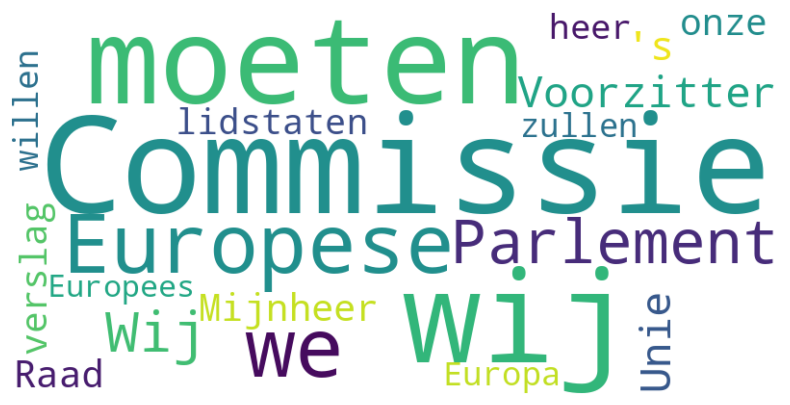

In [8]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_dict = dict(token_frequencies_nl_all.most_common(20))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
from collections import Counter

doc_representation_en = []

for sentence in processed_en:
    # Convert Stanza Sentence objects to a single string
    text = " ".join([sent.text for sent in sentence.sentences])

    # Apply remove_stopwords_and_punctuation to the string
    filtered_text = remove_stopwords_and_punctuation(text, 'english')

    # Calculate TTR using the filtered text
    token_frequencies_en = Counter(word_tokenize(filtered_text)) # Directly tokenize filtered text
    num_types = len(token_frequencies_en.keys())
    num_tokens = sum(token_frequencies_en.values())

    # Avoid division by zero if num_tokens is 0
    if num_tokens == 0:
        tt_ratio = 0  # or any other appropriate value for your use case
    else:
        tt_ratio = num_types / float(num_tokens)

    doc_representation_en.append(tt_ratio)

print(doc_representation_en)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 0.96875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9615384615384616, 1.0, 1.0, 1.0, 1.0, 0.9090909090909091, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7777777777777778, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8518518518518519, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9375, 1.0, 0.9090909090909091, 0.9310344827586207, 1.0, 0.9285714285714286, 1.0, 1.0, 1.0, 0.9444444444444444, 1.0, 0.9473684210526315, 1.0, 0.8979591836734694, 0.9629629629629629, 0.8809523809523809, 1.0, 1.0, 1.0, 1.0, 0.9393939393939394, 1.0, 0.9090909090909091, 0.8387096774193549, 1.0, 0.8636363636363636, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 1.0, 0.9655172413793104, 1.0, 0.8888888888888888, 1.0, 1.0, 0.8888888888888888, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9285714285714286, 1.0, 0.9473684210526315, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

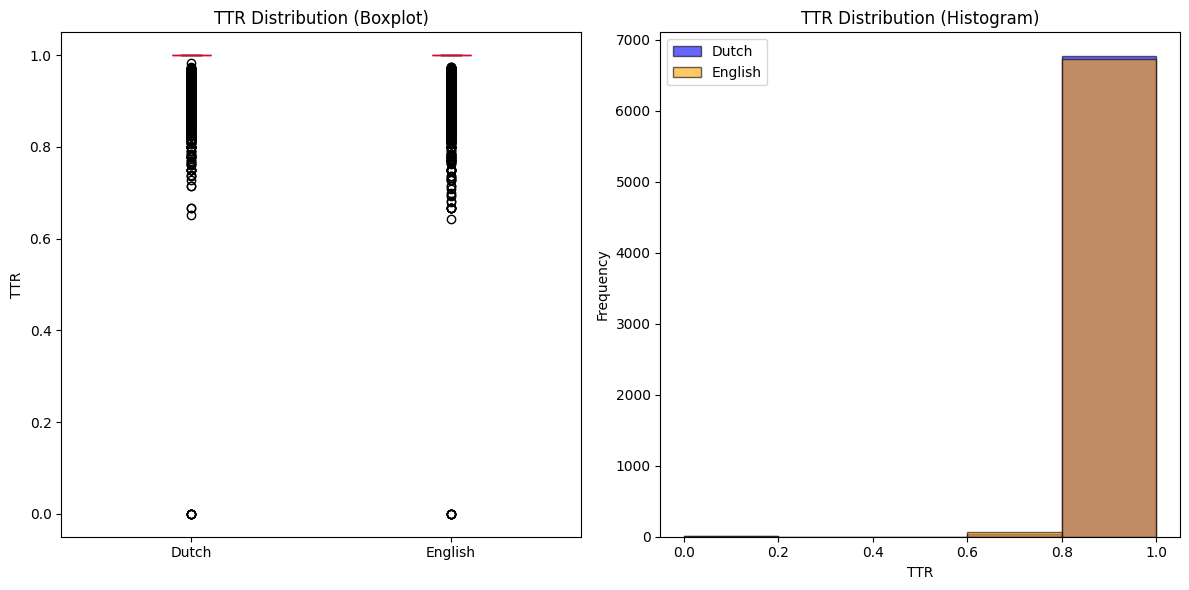

In [10]:
# Example data: TTR values for two languages
ttr_dutch = doc_representation_nl
ttr_english = doc_representation_en

# Plot Boxplot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # First subplot
plt.boxplot([ttr_dutch, ttr_english], labels=["Dutch", "English"], patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("TTR Distribution (Boxplot)")
plt.ylabel("TTR")

# Plot Histogram
plt.subplot(1, 2, 2)  # Second subplot
plt.hist(ttr_dutch, bins=5, alpha=0.6, label="Dutch", color="blue", edgecolor="black")
plt.hist(ttr_english, bins=5, alpha=0.6, label="English", color="orange", edgecolor="black")
plt.title("TTR Distribution (Histogram)")
plt.xlabel("TTR")
plt.ylabel("Frequency")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [11]:
token_frequencies_en_all = Counter()

for sentence in processed_en:
    # Convert Stanza Sentence objects to a single string
    text = " ".join([sent.text for sent in sentence.sentences])

    # Apply remove_stopwords_and_punctuation to the string
    filtered_text = remove_stopwords_and_punctuation(text, 'english')

    # Tokenize the filtered text and update the counter
    all_tokens = word_tokenize(filtered_text)
    token_frequencies_en_all.update(all_tokens)

print(token_frequencies_en_all.most_common(20))

[('Commission', 875), ('European', 818), ('would', 754), ('Mr', 726), ('also', 582), ('must', 520), ('Parliament', 504), ('President', 476), ('like', 422), ('Union', 386), ('report', 358), ('Member', 335), ('Council', 332), ('one', 315), ('States', 292), ('need', 287), ('Europe', 274), ('important', 248), ('us', 247), ('Commissioner', 241)]


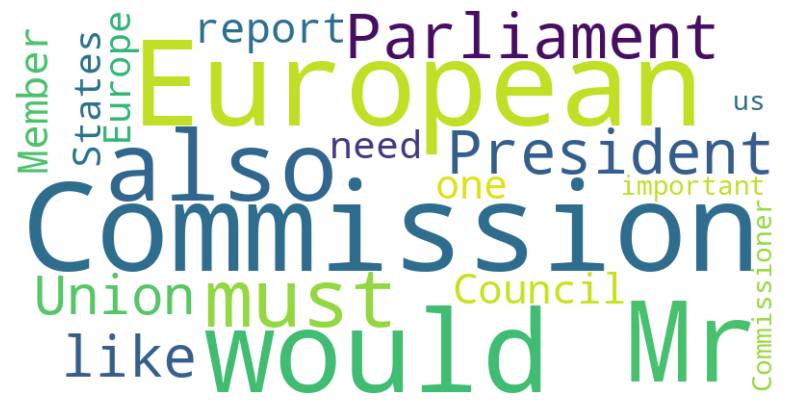

In [12]:
word_dict = dict(token_frequencies_en_all.most_common(20))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

POS

In [13]:
token_pos_frequencies_nl = Counter()
for sentence in processed_nl:
  for sent in sentence.sentences:
    token_pos = [(word.lemma, word.pos) for word in sent.words]
    token_pos_frequencies_nl.update(token_pos)

print(token_pos_frequencies_nl.most_common())

[(('de', 'DET'), 11921), (('.', 'PUNCT'), 7406), (('van', 'ADP'), 6071), ((',', 'PUNCT'), 5836), (('het', 'DET'), 4471), (('en', 'CCONJ'), 3974), (('zijn', 'AUX'), 3608), (('een', 'DET'), 3223), (('in', 'ADP'), 3172), (('dat', 'SCONJ'), 2331), (('te', 'ADP'), 2182), (('voor', 'ADP'), 1939), (('ik', 'PRON'), 1849), (('op', 'ADP'), 1739), (('worden', 'AUX'), 1514), (('moeten', 'AUX'), 1429), (('met', 'ADP'), 1387), (('niet', 'ADV'), 1343), (('die', 'PRON'), 1295), (('wij', 'PRON'), 1286), (('het', 'PRON'), 1235), (('hebben', 'AUX'), 1199), (('zullen', 'AUX'), 1186), (('aan', 'ADP'), 1111), (('ook', 'ADV'), 1022), (('om', 'ADP'), 1004), (('kunnen', 'AUX'), 998), (('we', 'PRON'), 834), (('over', 'ADP'), 827), (('er', 'ADV'), 825), (('dat', 'PRON'), 805), (('deze', 'DET'), 798), (('willen', 'VERB'), 772), (('dit', 'DET'), 768), (('commissie', 'NOUN'), 768), (('als', 'SCONJ'), 767), (('ons', 'PRON'), 706), (('maar', 'CCONJ'), 600), (('u', 'PRON'), 561), (('hebben', 'VERB'), 560), (('tot', 'A

In [14]:
token_pos_frequencies_en = Counter()
for sentence in processed_en:
  for sent in sentence.sentences:
    token_pos = [(word.lemma, word.pos) for word in sent.words]
    token_pos_frequencies_en.update(token_pos)

print(token_pos_frequencies_en.most_common())

[(('the', 'DET'), 12621), ((',', 'PUNCT'), 9119), (('be', 'AUX'), 6977), (('.', 'PUNCT'), 6604), (('of', 'ADP'), 5693), (('and', 'CCONJ'), 4386), (('to', 'PART'), 3757), (('in', 'ADP'), 3747), (('a', 'DET'), 3509), (('we', 'PRON'), 2441), (('that', 'SCONJ'), 2112), (('I', 'PRON'), 2067), (('to', 'ADP'), 1982), (('this', 'DET'), 1710), (('for', 'ADP'), 1688), (('it', 'PRON'), 1683), (('on', 'ADP'), 1502), (('have', 'AUX'), 1478), (('not', 'PART'), 1338), (('which', 'PRON'), 1250), (('-', 'PUNCT'), 1076), (('with', 'ADP'), 1035), (('will', 'AUX'), 987), (('this', 'PRON'), 925), (("'s", 'PART'), 833), (('that', 'PRON'), 824), (('European', 'ADJ'), 822), (('have', 'VERB'), 787), (('would', 'AUX'), 760), (('by', 'ADP'), 758), (('Mr', 'PROPN'), 726), (('at', 'ADP'), 600), (('commission', 'NOUN'), 598), (('also', 'ADV'), 587), (('should', 'AUX'), 567), (('but', 'CCONJ'), 567), (('as', 'SCONJ'), 556), (('make', 'VERB'), 539), (('can', 'AUX'), 535), (('must', 'AUX'), 521), (('all', 'DET'), 520)

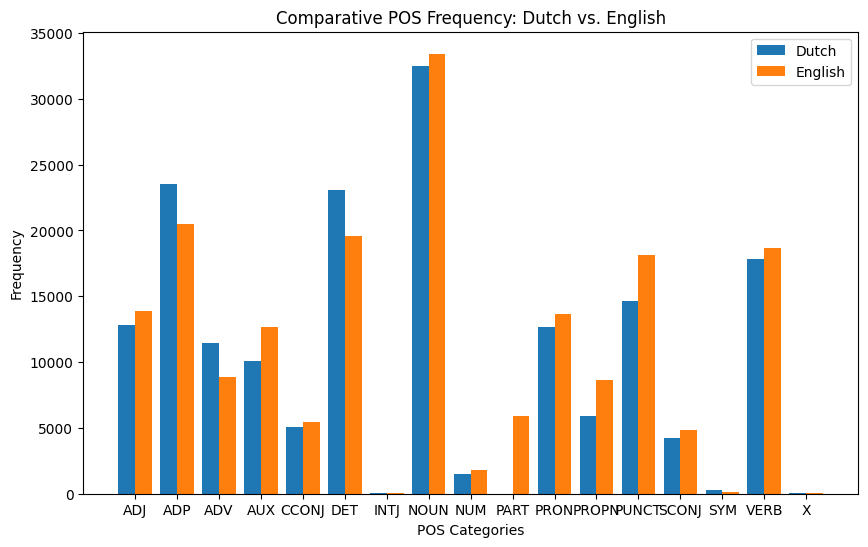

In [15]:
!pip install matplotlib pandas

# Example data for Language 1 (Dutch)
data_lang1 = token_pos_frequencies_nl.most_common()
# Example data for Language 2 (English)
data_lang2 = token_pos_frequencies_en.most_common()

# Aggregate POS counts for each language
def aggregate_pos_counts(data):
    pos_counts = {}
    for (_, pos), count in data:
        pos_counts[pos] = pos_counts.get(pos, 0) + count
    return pos_counts

pos_lang1 = aggregate_pos_counts(data_lang1)
pos_lang2 = aggregate_pos_counts(data_lang2)

# Create a DataFrame for comparison
df = pd.DataFrame({'POS': list(pos_lang1.keys()), 'Lang1': list(pos_lang1.values())})
df = df.merge(pd.DataFrame({'POS': list(pos_lang2.keys()), 'Lang2': list(pos_lang2.values())}), on='POS', how='outer').fillna(0)

# Plotting comparative bar chart
plt.figure(figsize=(10, 6))
x = range(len(df))
plt.bar(x, df['Lang1'], width=0.4, label='Dutch', align='center')
plt.bar([p + 0.4 for p in x], df['Lang2'], width=0.4, label='English', align='center')

# Add labels and legend
plt.xticks([p + 0.2 for p in x], df['POS'])
plt.xlabel("POS Categories")
plt.ylabel("Frequency")
plt.title("Comparative POS Frequency: Dutch vs. English")
plt.legend()
plt.show()

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during un

             word       lemma    pos           head       dep
0             The         the    DET            cat       det
1             cat         cat   NOUN            sat     nsubj
2             sat         sit   VERB           ROOT      root
3              on          on    ADP            mat      case
4             the         the    DET            mat       det
5             mat         mat   NOUN            sat       obl
6               .           .  PUNCT            sat     punct
7      Dependency  dependency   NOUN        parsing  compound
8         parsing     parsing   NOUN          helps     nsubj
9           helps        help   VERB           ROOT      root
10             in          in  SCONJ  understanding      mark
11  understanding  understand   VERB          helps     advcl
12            the         the    DET      structure       det
13      structure   structure   NOUN  understanding       obj
14             of          of    ADP      sentences      case
15      

,word,lemma,pos,head,dep
0,The,the,DET,cat,det
1,cat,cat,NOUN,sat,nsubj
2,sat,sit,VERB,ROOT,root
3,on,on,ADP,mat,case
4,the,the,DET,mat,det
5,mat,mat,NOUN,sat,obl
6,.,.,PUNCT,sat,punct
7,Dependency,dependency,NOUN,parsing,compound
8,parsing,parsing,NOUN,helps,nsubj
9,helps,help,VERB,ROOT,root


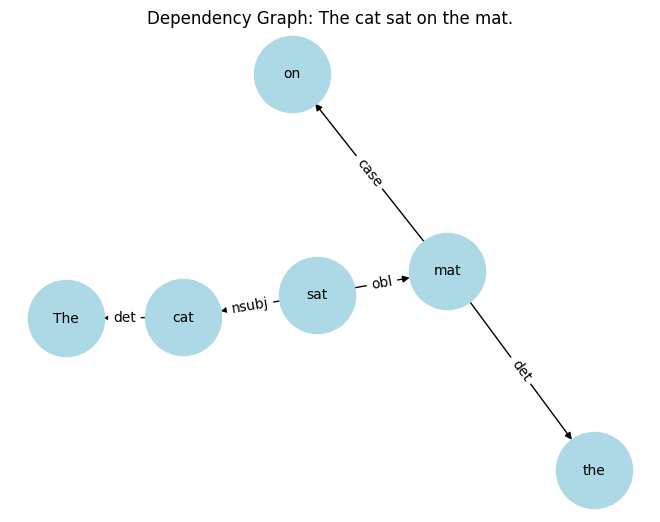

In [ ]:
import stanza
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Download the English model for Stanza
stanza.download('en')

# Load the pipeline
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')

# Example sentences
sentences = [
    "The cat sat on the mat.",
    "Dependency parsing helps in understanding the structure of sentences."
]

# Parse sentences and store results
parsed_sentences = []
for sentence in sentences:
    doc = nlp(sentence)
    for sentence in doc.sentences:
        for word in sentence.words:
            parsed_sentences.append({
                "word": word.text,
                "lemma": word.lemma,
                "pos": word.upos,
                "head": sentence.words[word.head - 1].text if word.head > 0 else "ROOT",
                "dep": word.deprel
            })

# Convert to DataFrame for table visualization
df = pd.DataFrame(parsed_sentences)
print(df)

# Visualize in table format
def display_table(dataframe):
    print(dataframe)
    try:
        from IPython.display import display
        display(dataframe)
    except ImportError:
        pass

display_table(df)

# Create a dependency graph
def plot_dependency_graph(parsed_sentence, sentence_text):
    graph = nx.DiGraph()

    # Add nodes and edges
    for word_data in parsed_sentence:
        word = word_data["word"]
        head = word_data["head"]
        dep = word_data["dep"]
        graph.add_node(word)
        if head != "ROOT":
            graph.add_edge(head, word, label=dep)

    # Draw the graph
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): d['label'] for u, v, d in graph.edges(data=True)})
    plt.title(f"Dependency Graph: {sentence_text}")
    plt.show()

# Visualize the dependency graph for the first sentence
plot_dependency_graph(parsed_sentences[:len(sentences[0].split())], sentences[0])

In [ ]:
import stanza

# Download and initialize Stanza models for English and Dutch
stanza.download('en')
stanza.download('nl')
nlp_en = stanza.Pipeline('en')
nlp_nl = stanza.Pipeline('nl')

def dependency_parsing(text, language):
    """
    Performs dependency parsing on the given text in the specified language using Stanza.

    Args:
        text (str): The input text.
        language (str): Language for parsing ('english' or 'dutch').

    Returns:
        list: A list of tuples containing words, their dependency relation, and head words.
    """
    # Select the appropriate Stanza model
    if language == 'english':
        nlp = nlp_en
    elif language == 'dutch':
        nlp = nlp_nl
    else:
        raise ValueError("Unsupported language. Choose 'english' or 'dutch'.")

    # Process the text
    doc = nlp(text)

    # Extract dependency information
    dependencies = []
    for sentence in doc.sentences:
        for word in sentence.words:
            dependencies.append((word.text, word.deprel, sentence.words[word.head - 1].text if word.head > 0 else 'ROOT'))

    return dependencies

for sentence in processed_nl:
    # Convert Stanza Sentence objects to a single string
    text = " ".join([sent.text for sent in sentence.sentences])
    print("Dutch Dependency Parsing:")
    for word, dep, head in dependency_parsing(text, 'dutch'):
        print(f"Word: {word}, Dependency: {dep}, Head: {head}")

for sentence in processed_en:
    # Convert Stanza Sentence objects to a single string
    text = " ".join([sent.text for sent in sentence.sentences])
    print("English Dependency Parsing:")
    for word, dep, head in dependency_parsing(text, 'english'):
        print(f"Word: {word}, Dependency: {dep}, Head: {head}")››


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: nl (Dutch) ...
INFO:stanza:File exists: /root/stanza_resources/nl/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: nl (Dutch):
| Processor | Package         |
-------------------------------
| tokenize  | alpino          |
| mwt       | alpino          |
| pos       | alpino_charlm   |
| lemma     | alpino_nocharlm |
| depparse  | alpino_charlm   |
| ner       | conll02         |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Streaminguitvoer ingekort tot de laatste 5000 regels.
Word: die, Dependency: nsubj, Head: komen
Word: er, Dependency: advmod, Head: komen
Word: ieder, Dependency: det, Head: jaar
Word: jaar, Dependency: obl, Head: komen
Word: in, Dependency: case, Head: Europa
Word: Europa, Dependency: obl, Head: komen
Word: op, Dependency: case, Head: weg
Word: de, Dependency: det, Head: weg
Word: weg, Dependency: obl, Head: komen
Word: komen, Dependency: acl:relcl, Head: miljoen
Word: ook, Dependency: advmod, Head: verwerkt
Word: op, Dependency: case, Head: manier
Word: een, Dependency: det, Head: manier
Word: fatsoenlijke, Dependency: amod, Head: manier
Word: manier, Dependency: obl, Head: verwerkt
Word: worden, Dependency: aux:pass, Head: verwerkt
Word: verwerkt, Dependency: advcl, Head: goed
Word: en, Dependency: cc, Head: komt
Word: dat, Dependency: nsubj, Head: komt
Word: komt, Dependency: conj, Head: goed
Word: ons, Dependency: iobj, Head: komt
Word: allemaal, Dependency: advmod, Head: komt
Wor

Average sentence length (ASL)

In [16]:
import statistics

sen_len_nl = []

for sen in processed_nl: # Changed 'sentence' to 'article'
    sentence_lengths = [len(sentence.tokens) for sentence in sen.sentences]
    sen_len_nl.append(statistics.mean(sentence_lengths))

print(sen_len_nl)
print(statistics.mean(sen_len_nl))

[4, 19, 14.5, 14, 21, 13, 11, 12, 21, 33, 66, 16, 14, 12, 16, 20, 25.5, 13, 26, 33, 24, 30, 77, 11, 12, 22, 26, 33, 20, 31.5, 49, 24, 41, 14, 50, 22, 27, 13, 23, 16, 14, 17, 14, 13, 14, 18, 9, 18, 29, 27, 14, 32, 9, 13, 14, 33, 16.5, 22, 10, 16, 17, 4, 30, 11, 4, 30, 17, 26, 37, 40, 32, 32, 35, 28, 35.5, 27, 30, 33, 31, 42, 33, 39.5, 6, 32, 12, 63, 32, 31.5, 72, 17, 53, 19.5, 12, 13, 6, 17, 23, 18.5, 24, 50, 7, 31.5, 22, 18, 25, 3, 25, 3, 25, 13, 6, 18, 14, 13, 14, 17, 10, 17.5, 12, 40, 5, 24, 7, 26, 16.5, 8, 11, 22, 12, 29, 9, 19, 10, 14, 23, 21, 10, 17, 10, 7, 81, 44, 22.333333333333332, 19.333333333333332, 26, 15, 16, 44, 39, 42, 26.5, 17, 23, 16, 13, 16, 17.5, 20, 9, 19.5, 29, 27, 25, 8, 50.5, 43, 22, 21, 16, 12, 29, 18, 7, 45, 23, 23, 22, 34, 7, 33, 23, 22, 26, 10, 8, 40, 8, 53, 20, 28, 16, 35, 44, 7, 24, 20.5, 8, 40, 18, 28, 10, 21, 32, 24, 24, 8, 18, 18, 34, 36.5, 40, 41, 20, 20, 26.5, 22, 18, 18, 42, 20, 34, 20, 5, 9, 7, 69, 74, 20, 15, 19, 18, 21, 29, 59, 10, 12, 24, 25, 43, 3

In [18]:
sen_len_en = []

for sen in processed_en: # Changed 'sentence' to 'article'
    sentence_lengths = [len(sentence.tokens) for sentence in sen.sentences]
    sen_len_en.append(statistics.mean(sentence_lengths))

print(sen_len_en)
print(statistics.mean(sen_len_en))

[4, 40, 37, 23, 46, 11, 11, 9, 24, 27, 52, 21, 14, 9, 11, 19, 40, 14, 29, 37, 31, 26, 77, 14, 12, 16, 23, 19.5, 20, 63, 58, 24, 46, 13, 50, 18, 24, 13, 24, 17, 13, 20, 7, 11, 7, 16, 19, 34, 31, 25, 14, 31, 10, 15, 17, 55, 16, 13, 16, 11, 21, 1, 38, 11, 4, 33, 18, 14, 60, 40, 27, 27, 28, 29, 33, 16.5, 42, 18, 115, 67, 110, 29, 7, 38, 8, 71, 29, 55, 70, 14, 50, 39, 12, 15, 6, 11, 17, 42, 19, 45, 8, 69, 28, 18, 15, 5, 12, 8, 22, 14, 7, 24, 10, 13, 18, 18, 8, 33, 11, 48, 5, 31, 6, 29, 29, 7, 24, 10, 19, 29, 10, 18, 19, 13, 23, 20, 20, 19, 10, 8, 76, 44, 51, 56, 57, 19, 18, 51, 33, 27, 61, 22, 25, 14, 39, 18, 39, 19, 9, 39, 69, 29, 31, 8, 75, 39, 40, 17, 18, 12, 35, 20, 9, 57, 29, 48, 22, 37, 10, 35, 24, 19, 28, 7, 9, 42, 11, 49, 21, 26, 13, 36, 46, 9, 23, 30, 10, 49, 37, 32, 14, 26, 34, 21, 22, 9, 24, 28, 33, 72, 41, 34, 28, 22, 54, 22, 21, 19, 46, 16, 59, 20, 5, 10, 6, 76, 83, 17, 16, 18, 22, 41, 25, 61, 23, 15, 23, 25, 39, 19, 46, 13, 37, 11, 44, 25, 15, 37, 25, 54, 28, 24, 15, 15, 23, 1

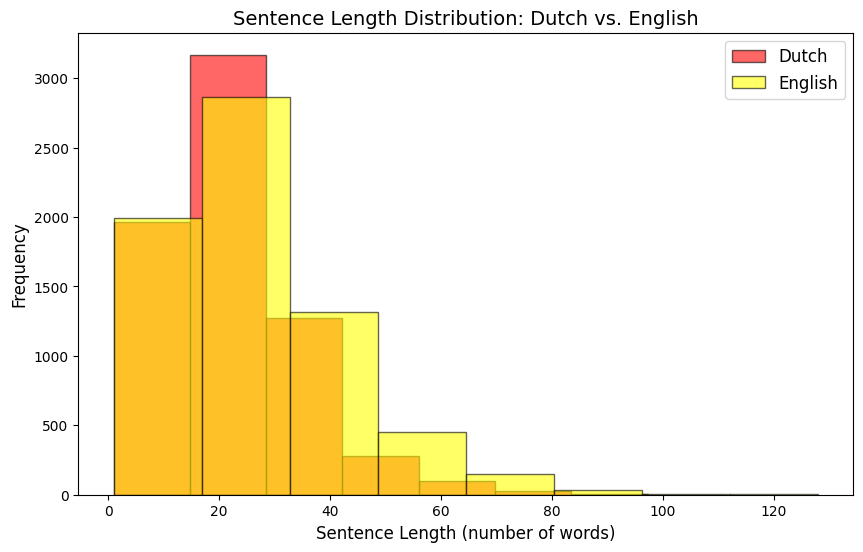

In [19]:
# Plotting histograms
plt.figure(figsize=(10, 6))

# Dutch histogram
plt.hist(sen_len_nl, bins=8, alpha=0.6, label='Dutch', color='red', edgecolor='black')

# English histogram
plt.hist(sen_len_en, bins=8, alpha=0.6, label='English', color='yellow', edgecolor='black')

# Adding labels and title
plt.title("Sentence Length Distribution: Dutch vs. English", fontsize=14)
plt.xlabel("Sentence Length (number of words)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12)

# Display the plot
plt.show()
